In [3]:
import os
import sys
import bilby

import configparser
import matplotlib.pyplot as plt

In [4]:
project_dir = os.environ['GLWORIA_PREFIX']
interpolator_dir = os.path.join(project_dir, 'interpolation')

sys.path.append(project_dir)

In [5]:
from glworia.load_interp import *
from bilby_scripts.waveform import *

config_path = './config/gSIS_arr1_fast_MLz_25/MLz_500_y_2.0000_kappa_1.0000.ini'
runname = os.path.splitext(os.path.basename(config_path))[0]

config = configparser.ConfigParser()
config.optionxform = str
config.read(config_path)

injection_parameters = dict(config.items('injection_parameters'))
interpolator_settings = dict(config.items('interpolator_settings'))
prior_settings = dict(config.items('prior_settings'))
waveform_arguments = dict(config.items('waveform_arguments'))
sampler_settings = dict(config.items('sampler_settings'))
misc = dict(config.items('misc'))

outdir = os.path.join(project_dir, 'outdir', misc['outdir_ext'])

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

# convert string to string, float, int, or bool in above dicts
for d in [injection_parameters, interpolator_settings, prior_settings, waveform_arguments, sampler_settings, misc]:
    for key, value in d.items():
        if is_number(value):
            d[key] = eval(value)
        elif value == 'True':
            d[key] = True
        elif value == 'False':
            d[key] = False

lp_name = misc['lp_name']
lp_latex = misc['lp_latex']

# Set the duration and sampling frequency of the data segment that we're
# going to inject the signal into
duration = misc['duration']
sampling_frequency = misc['sampling_frequency']
minimum_frequency = misc['minimum_frequency']

# Specify the output directory and the name of the simulation.
label = runname
outdir = os.path.join(outdir, misc['outdir_ext'], label)
os.makedirs(outdir, exist_ok=True)

bilby.core.utils.setup_logger(outdir=outdir, label=label)

# Set up a random seed for result reproducibility.  This is optional!
np.random.seed(misc['seed'])

interpolators = load_interpolators(interpolator_dir, **interpolator_settings)
F_interp_loaded = lambda w, y, lp: F_interp(w, y, lp, interpolators, interpolator_settings)

# Fixed arguments passed into the source model
waveform_arguments.update(F_interp = F_interp_loaded)

# Create the waveform_generator using a LAL BinaryBlackHole source function
# the generator will convert all the parameters
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=lal_binary_black_hole_lensed,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)


08:44 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby_scripts.waveform.lal_binary_black_hole_lensed
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [6]:
ifos = bilby.gw.detector.InterferometerList(["H1", "L1"])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency,
    duration=duration,
    start_time=injection_parameters["geocent_time"] - 2,
)
strain = ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters
)

/home/mcheung1/Lensing/Glworia_jax/glworia_jax/glworia/load_interp.py:210: RuntimeWarning: divide by zero encountered in divide
  return (1 + np.tanh((x - x0)/a))/2
/home/mcheung1/Lensing/Glworia_jax/glworia_jax/glworia/load_interp.py:210: RuntimeWarning: invalid value encountered in divide
  return (1 + np.tanh((x - x0)/a))/2
08:44 bilby INFO    : Injected signal in H1:
08:44 bilby INFO    :   optimal SNR = 60.88
08:44 bilby INFO    :   matched filter SNR = 60.38-1.36j
08:44 bilby INFO    :   mass_1 = 36.0
08:44 bilby INFO    :   mass_2 = 29.0
08:44 bilby INFO    :   a_1 = 0.4
08:44 bilby INFO    :   a_2 = 0.3
08:44 bilby INFO    :   tilt_1 = 0.5
08:44 bilby INFO    :   tilt_2 = 1.0
08:44 bilby INFO    :   phi_12 = 1.7
08:44 bilby INFO    :   phi_jl = 0.3
08:44 bilby INFO    :   luminosity_distance = 500.0
08:44 bilby INFO    :   theta_jn = 0.4
08:44 bilby INFO    :   psi = 2.659
08:44 bilby INFO    :   phase = 1.3
08:44 bilby INFO    :   MLz = 25.0
08:44 bilby INFO    :   geocent_tim

In [11]:
injection_parameters_2 = injection_parameters.copy()
injection_parameters_2['luminosity_distance'] = 2800
injection_parameters_2['y'] = 0.4
injection_parameters_2['lp'] = 0.1 
injection_parameters_2['MLz'] = 110

In [12]:
strain_2 = ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters_2
)

08:45 bilby INFO    : Injected signal in H1:
08:45 bilby INFO    :   optimal SNR = 58.75
08:45 bilby INFO    :   matched filter SNR = 173.94+0.43j
08:45 bilby INFO    :   mass_1 = 36.0
08:45 bilby INFO    :   mass_2 = 29.0
08:45 bilby INFO    :   a_1 = 0.4
08:45 bilby INFO    :   a_2 = 0.3
08:45 bilby INFO    :   tilt_1 = 0.5
08:45 bilby INFO    :   tilt_2 = 1.0
08:45 bilby INFO    :   phi_12 = 1.7
08:45 bilby INFO    :   phi_jl = 0.3
08:45 bilby INFO    :   luminosity_distance = 2800
08:45 bilby INFO    :   theta_jn = 0.4
08:45 bilby INFO    :   psi = 2.659
08:45 bilby INFO    :   phase = 1.3
08:45 bilby INFO    :   MLz = 110
08:45 bilby INFO    :   geocent_time = 1126259642.413
08:45 bilby INFO    :   ra = 1.375
08:45 bilby INFO    :   dec = -1.2108
08:45 bilby INFO    :   y = 0.4
08:45 bilby INFO    :   lp = 0.1
08:45 bilby INFO    : Injected signal in L1:
08:45 bilby INFO    :   optimal SNR = 47.54
08:45 bilby INFO    :   matched filter SNR = 141.66+1.56j
08:45 bilby INFO    :   ma

(1e-24, 1.556701700702105e-22)

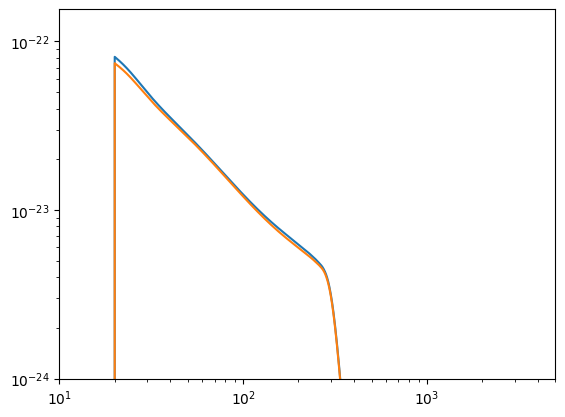

In [13]:
plt.loglog(ifos.frequency_array, np.abs(strain[0]['plus']))
plt.loglog(ifos.frequency_array, np.abs(strain_2[0]['plus']))

plt.xlim(10, 5000)
plt.ylim(1e-24, None)

/tmp/ipykernel_3135162/2857781713.py:1: RuntimeWarning: invalid value encountered in divide
  plt.loglog(ifos.frequency_array, np.abs(strain[0]['plus'])/np.abs(strain_2[0]['plus']))


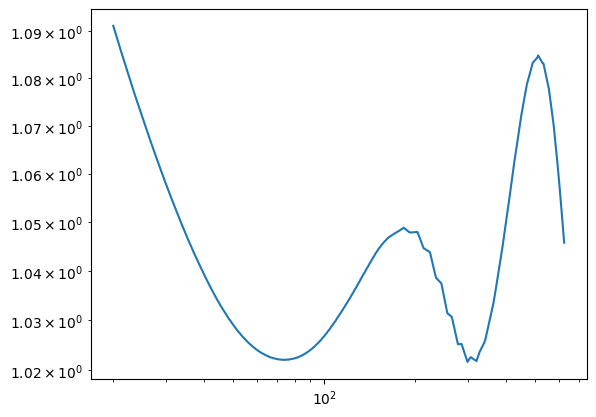

In [14]:
plt.loglog(ifos.frequency_array, np.abs(strain[0]['plus'])/np.abs(strain_2[0]['plus']))